In [1]:
%load_ext autoreload
%autoreload 2

import sys
import os

# Add the parent directory to the Python path
sys.path.append(os.path.abspath(os.path.join('..')))

In [6]:
import neural_net.nn as nn
from neural_net.visualize import visualize_genome, visualize_net, display_gene
from Sandbox import Sandbox
import random
import copy

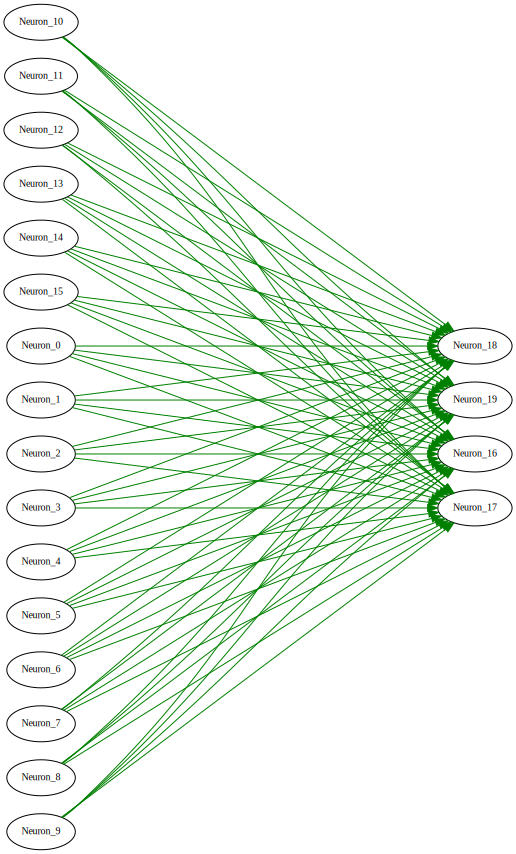

In [3]:
def create_dense_network(input_count=16, output_count=4):
    # Create input and output neurons
    input_neurons = [nn.NeuronGene(i, random.random()) for i in range(0, input_count)]
    output_neurons = [nn.NeuronGene(j + input_count, random.random()) for j in range(output_count)]
    
    # Create all possible synapse connections between input and output neurons
    synapse_gene = []
    SIN = 0
    for output_neuron in output_neurons:
        for input_neuron in input_neurons:
            synapse_gene.append(nn.SynapseGene(SIN, input_neuron, output_neuron, random.uniform(-1, 1), True))
            SIN += 1
            
    # Create the NetworkGenome
    network_genome = nn.NetworkGenome(input_neurons, output_neurons, [], synapse_gene)
    nn.NetworkGenome.SIN = SIN
    nn.NetworkGenome.NIN = input_count + output_count
    
    return network_genome

# Example usage
dense_network_genome = create_dense_network()
visualize_genome(dense_network_genome, 'LR', False, '5')

In [37]:
net = nn.Network(dense_network_genome)

In [38]:
s = Sandbox(net, False)

In [39]:
s.game

[[0, 0, 0, 0]
 [2, 0, 0, 0]
 [0, 0, 0, 0]
 [2, 0, 0, 0]]

In [40]:
for i in range(100):
    s.set_input()
    s.make_next_move()
    s.reset_update()

GameStuckException: Game stuck at score 4

In [41]:
sims = []
for i in range(1000):
    dense_network_genome = create_dense_network()
    net = nn.Network(dense_network_genome)
    s = Sandbox(net) # debug = False
    sims.append(s)
    try:
        for _ in range(100):
            s.set_input()
            s.make_next_move()
            s.reset_update()
    except:
        print(f'sim #{i} done: fitness -> {s.network.fitness}')

sim #0 done: fitness -> 2
sim #1 done: fitness -> 4
sim #2 done: fitness -> 4
sim #3 done: fitness -> 2
sim #4 done: fitness -> 4
sim #5 done: fitness -> 4
sim #6 done: fitness -> 8
sim #7 done: fitness -> 4
sim #8 done: fitness -> 2
sim #9 done: fitness -> 4
sim #10 done: fitness -> 4
sim #11 done: fitness -> 4
sim #12 done: fitness -> 2
sim #13 done: fitness -> 8
sim #14 done: fitness -> 2
sim #15 done: fitness -> 8
sim #16 done: fitness -> 2
sim #17 done: fitness -> 4
sim #18 done: fitness -> 8
sim #19 done: fitness -> 4
sim #20 done: fitness -> 4
sim #21 done: fitness -> 4
sim #22 done: fitness -> 4
sim #23 done: fitness -> 4
sim #24 done: fitness -> 2
sim #25 done: fitness -> 8
sim #26 done: fitness -> 2
sim #27 done: fitness -> 4
sim #28 done: fitness -> 4
sim #29 done: fitness -> 8
sim #30 done: fitness -> 4
sim #31 done: fitness -> 2
sim #32 done: fitness -> 2
sim #33 done: fitness -> 2
sim #34 done: fitness -> 8
sim #35 done: fitness -> 4
sim #36 done: fitness -> 4
sim #37 don

In [42]:
avg_fitness = sum([sim.network.fitness for sim in sims]) / 1000
avg_fitness

5.506

In [43]:
for _ in range(10):
    sims_2 = []
    for i, sim in enumerate(sims):
        sim.network.genome.mutate()
        net = nn.Network(sim.network.genome)
        s = Sandbox(net) # debug = False
        sims_2.append(s)
        try:
            for _ in range(100):
                s.set_input()
                s.make_next_move()
                s.reset_update()
        except:
            print(f'sim #{i} done: fitness -> {s.network.fitness}')
    print(sum([sim.network.fitness for sim in sims_2]) / 1000)

[synapse weight change mutation] @ sg 8 (-0.58 -> 0.51)
sim #0 done: fitness -> 4
sim #1 done: fitness -> 4
sim #2 done: fitness -> 4
[synapse weight change mutation] @ sg 32 (-0.34 -> 0.73)
sim #3 done: fitness -> 4
[synapse weight change mutation] @ sg 8 (0.68 -> 0.36)
[synapse weight change mutation] @ sg 28 (-0.85 -> 0.35)
sim #4 done: fitness -> 4
sim #5 done: fitness -> 2
sim #6 done: fitness -> 4
[synapse weight change mutation] @ sg 12 (-0.76 -> 0.96)
sim #7 done: fitness -> 8
sim #8 done: fitness -> 8
[synapse weight change mutation] @ sg 3 (0.48 -> 0.80)
sim #9 done: fitness -> 4
sim #10 done: fitness -> 4
sim #11 done: fitness -> 16
sim #12 done: fitness -> 4
sim #13 done: fitness -> 2
[synapse weight change mutation] @ sg 44 (-0.19 -> 0.99)
sim #14 done: fitness -> 4
sim #15 done: fitness -> 4
[synapse weight change mutation] @ sg 10 (-0.95 -> 0.83)
sim #16 done: fitness -> 4
sim #17 done: fitness -> 4
sim #18 done: fitness -> 4
[synapse weight change mutation] @ sg 48 (-0.

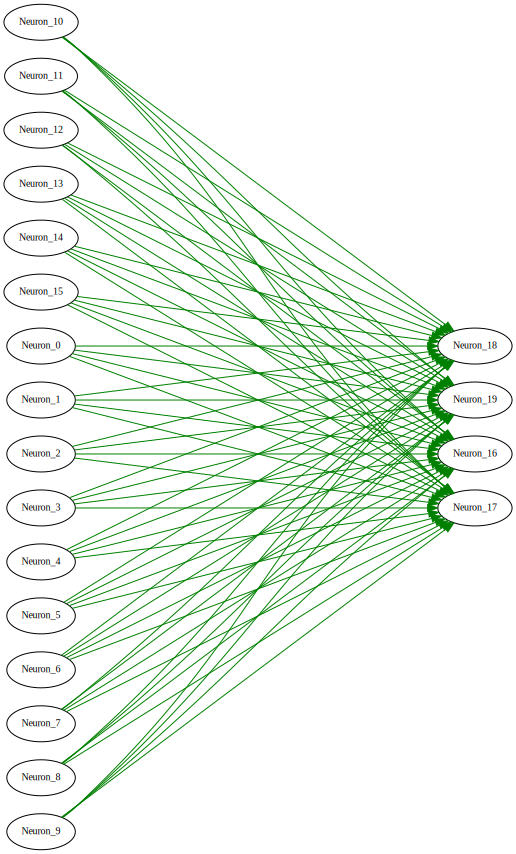

In [44]:
visualize_genome(sims_2[223].network.genome, 'LR', False, '5')

In [46]:
sims_2[17].network.genome.synapse_gene

[[SynapseGene 0] Neuron 0 -> Neuron 16, Weight: 0.5653794051232455, Enabled,
 [SynapseGene 1] Neuron 1 -> Neuron 16, Weight: -0.5477583912352466, Enabled,
 [SynapseGene 2] Neuron 2 -> Neuron 16, Weight: -0.229593024689682, Disabled,
 [SynapseGene 3] Neuron 3 -> Neuron 16, Weight: 0.9093195986608001, Enabled,
 [SynapseGene 4] Neuron 4 -> Neuron 16, Weight: 0.12270956127128785, Enabled,
 [SynapseGene 5] Neuron 5 -> Neuron 16, Weight: -0.38500546038828265, Enabled,
 [SynapseGene 6] Neuron 6 -> Neuron 16, Weight: 0.18945480834407857, Enabled,
 [SynapseGene 7] Neuron 7 -> Neuron 16, Weight: 0.5829255486007365, Enabled,
 [SynapseGene 8] Neuron 8 -> Neuron 16, Weight: 0.466433880729199, Enabled,
 [SynapseGene 9] Neuron 9 -> Neuron 16, Weight: 0.40406908677955755, Enabled,
 [SynapseGene 10] Neuron 10 -> Neuron 16, Weight: -0.1954199218902113, Enabled,
 [SynapseGene 11] Neuron 11 -> Neuron 16, Weight: -0.9571328373427068, Enabled,
 [SynapseGene 12] Neuron 12 -> Neuron 16, Weight: 0.933644757425

In [214]:
avg_fitness = sum([sim.network.fitness for sim in sims_2]) / 1000
avg_fitness

5.76

In [18]:
sims_2[17].network.neurons

[[Neuron 0] Bias: 0,
 [Neuron 1] Bias: 0,
 [Neuron 2] Bias: 0,
 [Neuron 3] Bias: 0,
 [Neuron 4] Bias: 0,
 [Neuron 5] Bias: 0,
 [Neuron 6] Bias: 0,
 [Neuron 7] Bias: 0,
 [Neuron 8] Bias: 0,
 [Neuron 9] Bias: 0,
 [Neuron 10] Bias: 0,
 [Neuron 11] Bias: 0,
 [Neuron 12] Bias: 0,
 [Neuron 13] Bias: 0,
 [Neuron 14] Bias: 0,
 [Neuron 15] Bias: 0,
 [Neuron 16] Bias: 0,
 [Neuron 17] Bias: 0,
 [Neuron 18] Bias: 0,
 [Neuron 19] Bias: 0]

In [5]:
a = create_dense_network()
b = create_dense_network()

In [7]:
c = copy.deepcopy(a)

In [9]:
nn.NetworkGenome.distance(c, b, 1, 1, 1)

0.6404708151317988

In [15]:
a = [1, 2, 3, 4, 5]
b = len(a)

[rank / sum([_ for _ in range(1, b+1)]) for rank in range(b, 1, -1)]

[0.3333333333333333, 0.26666666666666666, 0.2, 0.13333333333333333]